In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.utils.data as data
import torchvision as tv
import torchvision.transforms as tf
from PIL import Image
%matplotlib inline

## 1.图像变换组合器 transforms.compose 

使用列表将不同的图像变换组合在一起，传入compose，形成组合对象.

## 2.对PIL图像进行变换 Transforms on PIL Image

### 2.1 中心裁剪 CenterCrop

In [7]:
img=Image.open('./data/images/dog/L3.png')
img.size

(176, 249)

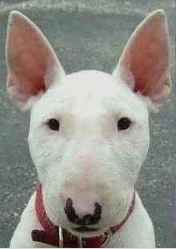

In [11]:
img

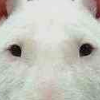

In [10]:
cc=tf.CenterCrop(size=100)
cc(img)

### 2.2 随机改变图像的亮度、对比度和饱和度 tf.ColorJitter

可以传入相关指标的参数，将影响随机改变的程度.

详见文档.

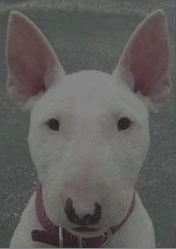

In [14]:
cj=tf.ColorJitter(0.5,0.4,0.3,0.2)
cj(img)

### 2.3 四角加中心裁剪 tf.FiveCrop

参数为相应裁剪处尺寸.

In [16]:
fc=tf.FiveCrop(50)
img5=fc(img)

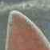

In [17]:
img5[0]

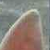

In [18]:
img5[1]

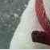

In [19]:
img5[2]

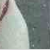

In [20]:
img5[3]

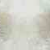

In [21]:
img5[4]

### 2.4 对图像进行灰阶处理 tf.GrayScale

参数为输出的通道数.

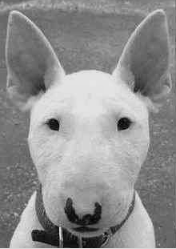

In [23]:
gs3=tf.Grayscale(3)
img3=gs3(img)
img3

In [24]:
pix3=np.array(img3)
pix3.shape

(249, 176, 3)

In [25]:
##选择3通道的灰阶输出，通道值r=g=b
pix3[0,0,0]

94

In [26]:
pix3[0,0,1]

94

In [27]:
pix3[0,0,2]

94

In [28]:
pix3[100,0,0]

130

In [29]:
pix3[100,0,1]

130

In [30]:
pix3[100,0,2]

130

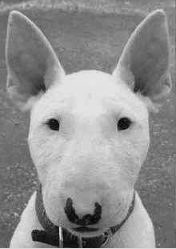

In [32]:
gs1=tf.Grayscale(1)
img1=gs1(img)
img1

In [34]:
pix1=np.array(img1)

In [35]:
pix1.shape

(249, 176)

In [37]:
pix1[0,0]

94

In [38]:
pix1[100,0]

130

### 2.5 线性变换 LinearTransformation

输入一个方阵，对图像做线性变换，比如白化（whitening）操作.

### 2.6 填充 tf.Pad

通过对图像指定边界填充大小、填充值、填充模式，对图像进行填充操作.

### 2.7 随机仿射 tf.RandomAffine

参数意义参看文档.

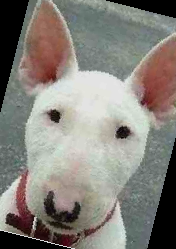

In [45]:
ra=tf.RandomAffine(20)
img_ra=ra(img)
img_ra

### 2.8 以指定概率对图像施行指定变换 tf.RandomApply

参数见文档.

### 2.9 从给定的变换列表中随机选择一个对图像进行变换 tf.RandomChoice

### 2.10 随机裁剪 tf.RandomCrop


可指定裁剪尺寸和填充等相关参数.

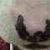

In [53]:
rc=tf.RandomCrop(50)
rc_img=rc(img)
rc_img

### 2.11 随机灰阶化 RandomGrayscale

以指定概率对图像进行随机灰阶化.

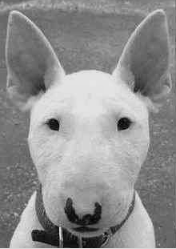

In [57]:
rg=tf.RandomGrayscale(0.8)
rg_img=rg(img)
rg_img

### 2.12 随机水平反转 RandomHorizontalFlip

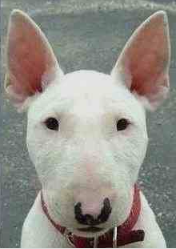

In [59]:
rhf=tf.RandomHorizontalFlip(0.7)
rhf_img=rhf(img)
rhf_img

### 2.13 以给定的变换列表随机对图像进行变换 tf.RandomOrder

### 2.14 随机缩放再裁剪tf.RandomResizedCrop

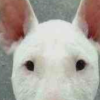

In [62]:
rrc=tf.RandomResizedCrop(100)
rrc_img=rrc(img)
rrc_img

### 2.15 随机旋转 tf.RandomRotation

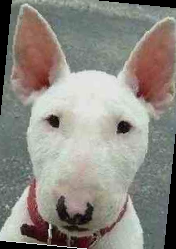

In [64]:
rr=tf.RandomRotation(40)
rr_img=rr(img)
rr_img

### 2.16 随机垂直反转 tf.RandomVerticalFlip

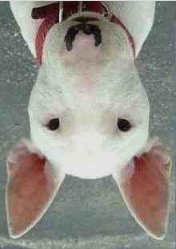

In [66]:
rvf=tf.RandomVerticalFlip(0.8)
rvf_img=rvf(img)
rvf_img

### 2.17 缩放 tf.Resize

In [70]:
import PIL
##   H , W . 高在前，宽在后.
rs1=tf.Resize((64,28),interpolation=PIL.Image.BILINEAR)
rs1_img=rs1(img)
rs1_img

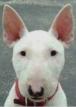

In [75]:
##如果指定的尺寸是一个整数n，那么较小的边为n，较大的边为 (h/w)*n. 假设 h 是大边.

rs2=tf.Resize(76,interpolation=PIL.Image.BILINEAR)
rs2_img=rs2(img)
rs2_img

### 2.18 正反四角加中心裁剪 tf.TenCrop

反转前裁剪5幅，反转后再裁剪5幅.可选择水平或垂直反转.

## 3. 对 torch.*Tensor 进行变换

### 3.1 标准化 tf.Normalize

- 给定均值和标准差序列，其中序列顺序是通道的顺序，序列长度是通道数，对张量图像逐通道进行标准化.


- 张量图像格式为(C,H,W)


- 注意这个函数是in-place操作.直接对输入张量进行改变.

## 4. 转换变换 Tensor，ndarray，PIL 之间的互转

包括Tensor或ndarray转PIL:
- CHW的Tensor转PIL
- HWC的ndarray转PIL

以及PIL或ndarray转Tensor:
- 范围是[0,255]的PIL或ndarray(HWC)转范围[0.,1.0]的CHW的FloatTensor

### 4.1 PIL/ndarray 转 Tensor ： tf.ToTensor

- 转之前:HWC, [0,255],  uint8


- 转之后:CHW, [0.,1.],  float32

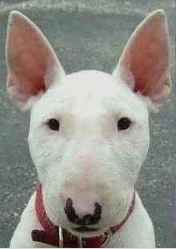

In [101]:
img

In [103]:
print(type(img),'\n',img.mode,'\n',img.size)

<class 'PIL.PngImagePlugin.PngImageFile'> 
 RGB 
 (176, 249)


In [107]:
##0.从PIL转到ndarray
nd_img=np.array(img)
nd_img.shape ##这是 HWC 数据格式

(249, 176, 3)

In [110]:
##1.从PIL转到Tensor
tt=tf.ToTensor()
t1=tt(img)
t1.shape## 已转换为CHW 数据格式

torch.Size([3, 249, 176])

In [111]:
t1.dtype## 使用float32类型

torch.float32

In [114]:
##2.从ndarray转到Tensor
##uint8-->float32
##HWC-->CHW
t2=tt(nd_img)
print('t2:dtype={}, shape={}\n nd_img:dtype={},shape={}'.format(t2.dtype,t2.shape,nd_img.dtype,nd_img.shape))

t2:dtype=torch.float32, shape=torch.Size([3, 249, 176])
 nd_img:dtype=uint8,shape=(249, 176, 3)


In [115]:
nd_img[0,0,0]

89

In [116]:
t2[0,0,0]

tensor(0.3490)

### 4.2 Tensor或 ndarray 转到 PIL


In [118]:
##1. Tensor-->PIL
torch.all(t2==t1)

tensor(1, dtype=torch.uint8)

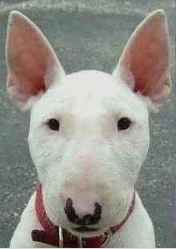

In [122]:
##Tensor to PIL
tp=tf.ToPILImage('RGB')##如这里不指定mode，则会根据输入数据的类型进行推断而得出一个mode
img1=tp(t1)
img1

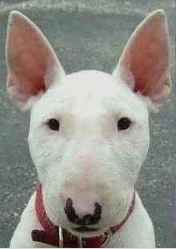

In [120]:
## ndarray to PIL
img2=tp(nd_img)
img2